In [199]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/mushroom-classification/mushrooms.csv


In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.layers import Dropout
from keras.constraints import maxnorm
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from IPython.core.interactiveshell import InteractiveShell

In [201]:
df = pd.read_csv('/kaggle/input/mushroom-classification/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [202]:
df.shape

(8124, 23)

In [203]:
df.isnull().any()

class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

In [204]:
df = df.drop_duplicates()
df.shape

(8124, 23)

In [205]:
without_class_df = df.drop(['class'], axis=1)
with_class_df = df['class']
df = pd.get_dummies(without_class_df, columns=without_class_df.columns)
df = df.join(with_class_df, how='left')
df.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,class
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,p
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,e
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,e
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,p
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,e


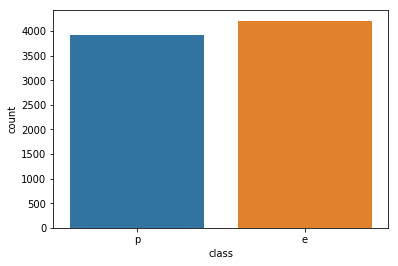

In [206]:
sns.countplot(df['class'])

In [207]:
X = df.drop(['class'], axis=1)
Y = df['class']
Y = Y.replace({'p':0, 'e': 1})
Y

0       0
1       1
2       1
3       0
4       1
       ..
8119    1
8120    1
8121    1
8122    0
8123    1
Name: class, Length: 8124, dtype: int64

In [208]:
train_features, test_features, train_labels, test_labels = train_test_split(X, Y, test_size=0.2, random_state=0)

In [211]:
model = Sequential()
model.add(Dense(12, input_dim=117, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.add(Dropout(0.3))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_features, train_labels)
model_pred_train = model.predict_classes(train_features)
model_pred_test = model.predict_classes(test_features)

Epoch 1/1
6499/6499 [==============================] - 0s 71us/step - loss: 3.3670 - accuracy: 0.7443


In [212]:
print(classification_report(test_labels,model_pred_test))
print('Neural Network baseline: ' + str(roc_auc_score(train_labels, model_pred_train)))
print('Neural Network: ' + str(roc_auc_score(test_labels, model_pred_test)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       773
           1       1.00      0.95      0.97       852

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625

Neural Network baseline: 0.9755560533899233
Neural Network: 0.9747652582159625
